In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('./covid19_tweets.csv','./finalSentimentdata2.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string

In [12]:
pip install wordcloud 


Note: you may need to restart the kernel to use updated packages.


In [13]:
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install IPython 

Note: you may need to restart the kernel to use updated packages.


In [2]:
from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

In [38]:
data=pd.read_csv("./covid19_tweets.csv")
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [8]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,179098,179099,179100,179101,179102,179103,179104,179105,179106,179107
user_name,ᏉᎥ☻լꂅϮ,Tom Basile 🇺🇸,Time4fisticuffs,ethel mertz,DIPR-J&K,🎹 Franz Schubert,hr bartender,Derbyshire LPC,Prathamesh Bendre,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,...,John Geer,amyracecar,Lori Comstock,New Jersey Herald,Pris,AJIMATI AbdulRahman O.,Jason,BEEHEMOTH ⏳,Gary DelPonte,TUKY II
user_location,astroworld,"New York, NY","Pewee Valley, KY",Stuck in the Middle,Jammu and Kashmir,Новоро́ссия,"Gainesville, FL",NaN,NaN,👇🏻location at link below👇🏻,...,NaN,"la playa, el mar .. mi corazón","Newton, NJ","Newton, NJ",T.O.,"Ilorin, Nigeria",Ontario,🇨🇦 Canada,New York City,"Aliwal North, South Africa"
user_description,wednesday addams as a disney princess keepin i...,"Husband, Father, Columnist & Commentator. Auth...",#Christian #Catholic #Conservative #Reagan #Re...,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,🖊️Official Twitter handle of Department of Inf...,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,Workplace tips and advice served up in a frien...,NaN,"A poet, reiki practitioner and a student of law.","Just as the body is one & has many members, & ...",...,#StayAtHome #StayAtHomeSaveLifes #MaskUp \nFor...,"culinary wizard, auto mechanic, and botanist",@njherald reporter || chasing crime and coveri...,"The New Jersey Herald, a daily newspaper in Ne...","A/V/L Techie, camera op. but twitter has becom...",Animal Scientist|| Muslim|| Real Madrid/Chelsea,When your cat has more baking soda than Ninja ...,⚒️ The Architects of Free Trade ⚒️ Really Did ...,"Global UX UI Visual Designer. StoryTeller, Mus...",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...
user_created,2017-05-26 05:46:42,2009-04-16 20:06:23,2009-02-28 18:57:41,2019-03-07 01:45:06,2017-02-12 06:45:15,2018-03-19 16:29:52,2008-08-12 18:19:49,2012-02-03 18:08:10,2015-04-25 08:15:41,2014-08-17 04:53:22,...,2020-04-18 01:55:14,2014-02-06 00:55:53,2015-05-27 16:35:15,2010-01-07 18:19:37,2008-12-31 16:16:12,2013-12-30 18:59:19,2011-12-21 04:41:30,2016-07-13 17:21:59,2009-10-27 17:43:13,2018-04-14 17:30:07
user_followers,624,2253,9275,197,101009,1180,79956,608,25,55201,...,61,128,335,6274,251,412,150,1623,1338,97
user_friends,950,1677,9525,987,168,1071,54810,355,29,34239,...,168,542,44,162,160,1609,182,2160,1111,1697
user_favourites,18775,24,7254,1488,101,1287,3801,95,18,29802,...,10817,3506,99,38,627,1062,7295,98000,0,566
user_verified,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
date,2020-07-25 12:27:21,2020-07-25 12:27:17,2020-07-25 12:27:14,2020-07-25 12:27:10,2020-07-25 12:27:08,2020-07-25 12:27:06,2020-07-25 12:27:03,2020-07-25 12:27:00,2020-07-25 12:26:59,2020-07-25 12:26:54,...,2020-08-29 19:44:34,2020-08-29 19:44:34,2020-08-29 19:44:27,2020-08-29 19:44:27,2020-08-29 19:44:23,2020-08-29 19:44:21,2020-08-29 19:44:16,2020-08-29 19:44:15,2020-08-29 19:44:14,2020-08-29 19:44:08
text,If I smelled the scent of hand sanitizers toda...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@brookbanktv The one gift #COVID19 has give me...,25 July : Media Bulletin on Novel #CoronaVirus...,#coronavirus #covid19 deaths continue to rise....,How #COVID19 Will Change Work in General (and ...,You now have to wear face coverings when out s...,Praying for good health and recovery of @Chouh...,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,...,Report #COVID19 outbreaks in K-12 schools here...,I have NOTHING BUT 💚 for the @NBA these days.....,Wallkill school nurse adds COVID-19 monitoring...,Wallkill school nurse adds COVID-19 monitoring...,"we have reached 25mil cases of #covid19, world...",Thanks @IamOhmai for nominating me for the @WH...,2020! The year of insanity! Lol! #COVID19 http...,@CTVNews A powerful painting by Juan Lucena. I...,"More than 1,200 students test positive for #CO...",I stop when I see a Stop\n\n@SABCNews\n@Izinda...


In [9]:
print("There are {} rows and {} columns in the dataset.".format(data.shape[0],data.shape[1]))

There are 179108 rows and 13 columns in the dataset.


In [32]:
data = pd.read_csv("covid19_tweets.csv")
data


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


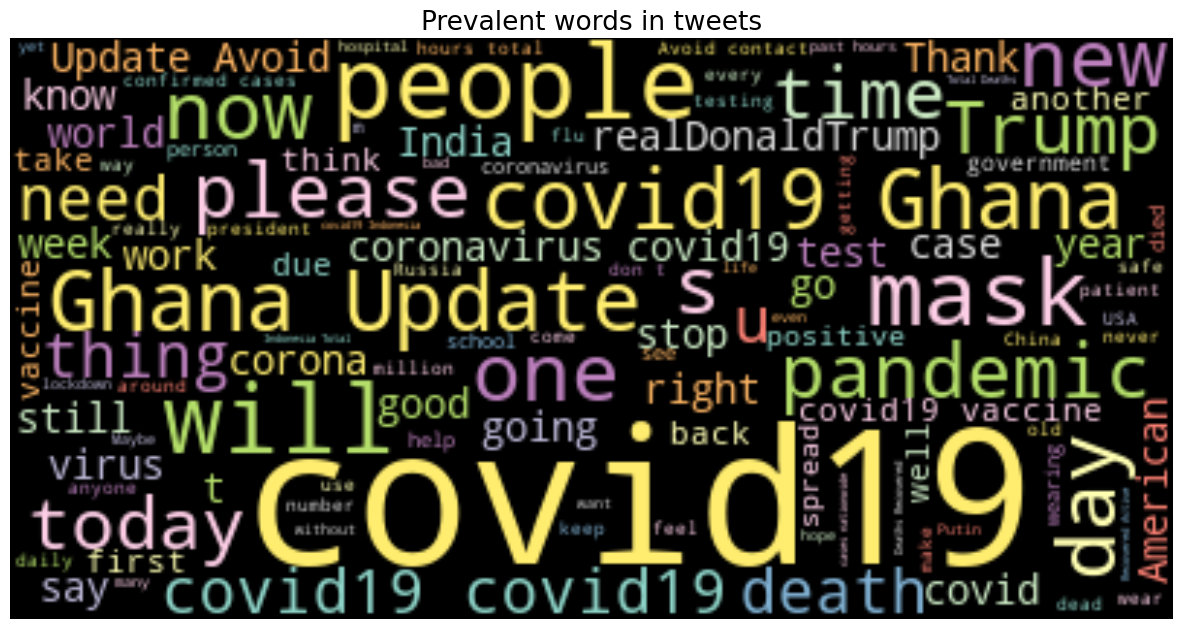

In [11]:
text = ",".join(review for review in data.text if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in tweets',fontsize=19)
plt.show()


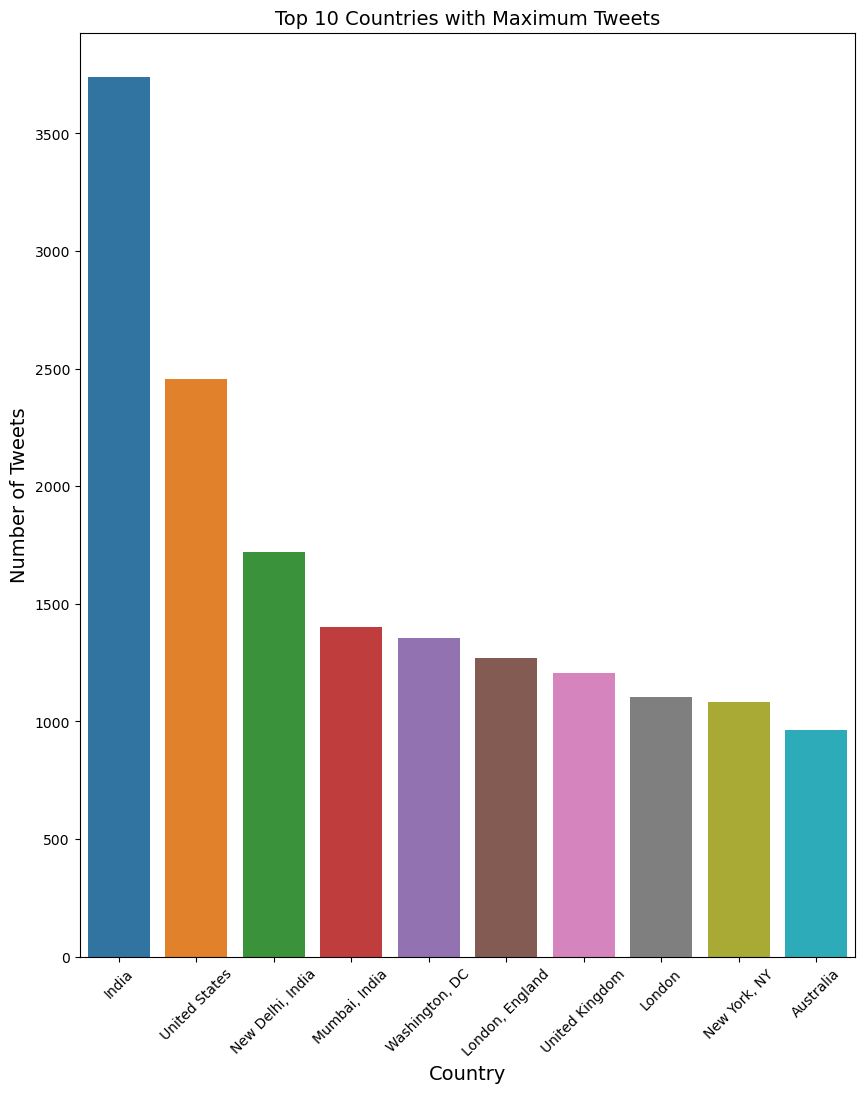

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is a Pandas DataFrame with a 'user_location' column
# Replace this with your actual data loading logic
# Example: data = pd.read_csv('your_data.csv')

# Create a bar plot for the top 10 countries
plt.figure(figsize=(10, 12))
sns.barplot(x=data["user_location"].value_counts().index[:10],
            y=data["user_location"].value_counts().values[:10])

plt.title("Top 10 Countries with Maximum Tweets", fontsize=14)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


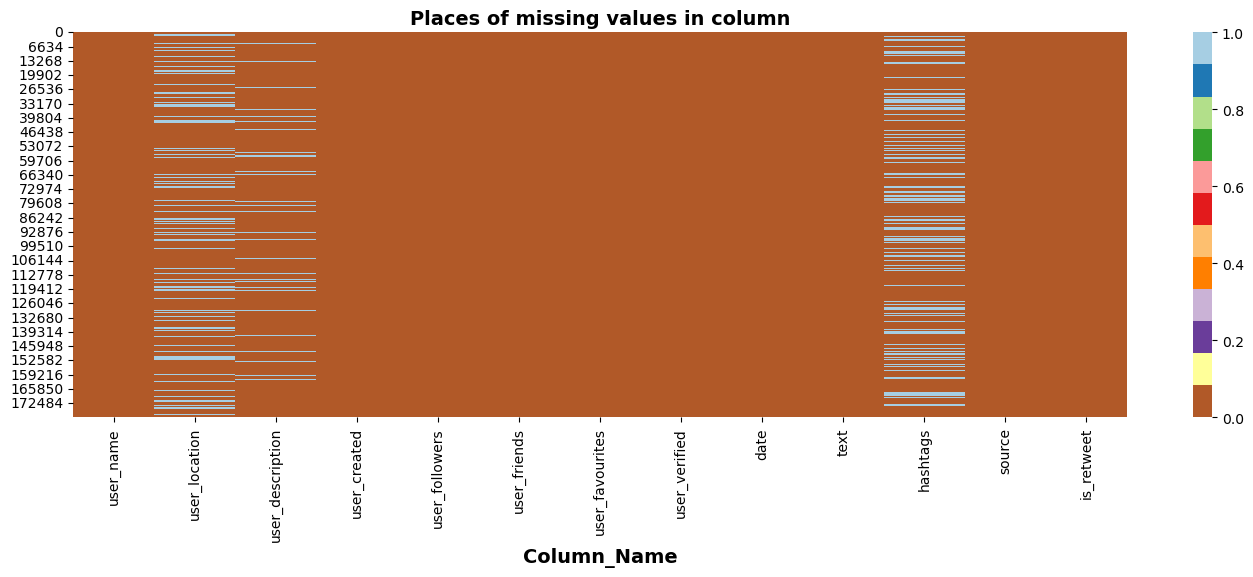

In [17]:
plt.figure(figsize=(17, 5))
sns.heatmap(data.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

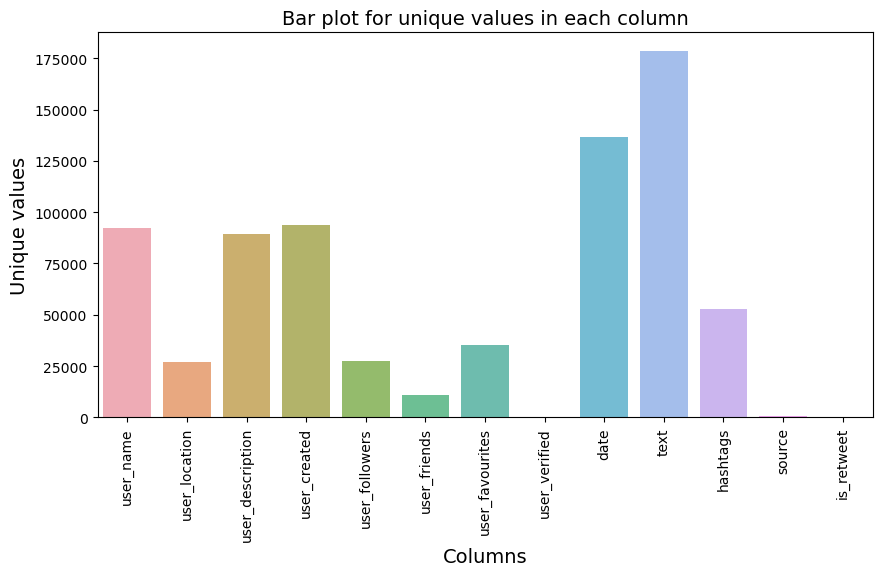

In [40]:
def unique_values_funct(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

udf = unique_values_funct(data)

f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for unique values in each column', fontsize=14)
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.xticks(rotation=90)
plt.show()


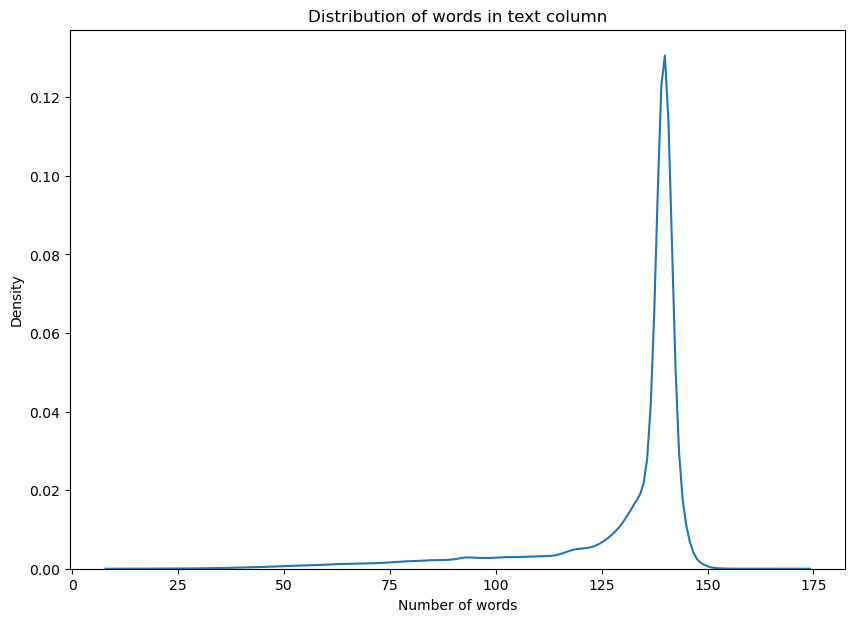

In [19]:
data["num of words in text"] = data["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(data["num of words in text"])
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

In [48]:
print(data.columns)


Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'Month', 'day'],
      dtype='object')


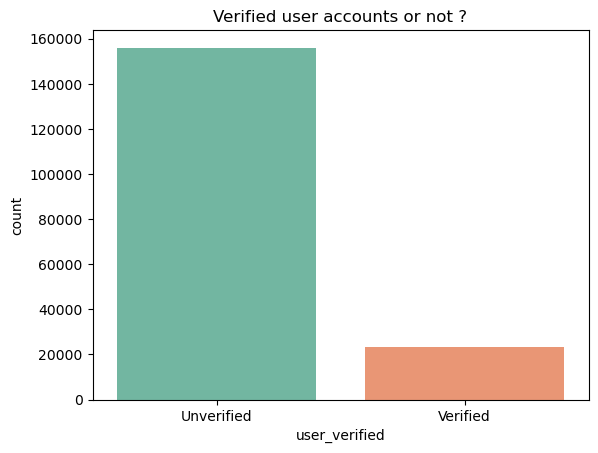

In [42]:
sns.countplot(x ="user_verified",data=data, palette="Set2")
plt.title("Verified user accounts or not ?")
plt.xticks([False,True],['Unverified','Verified'])
plt.show()

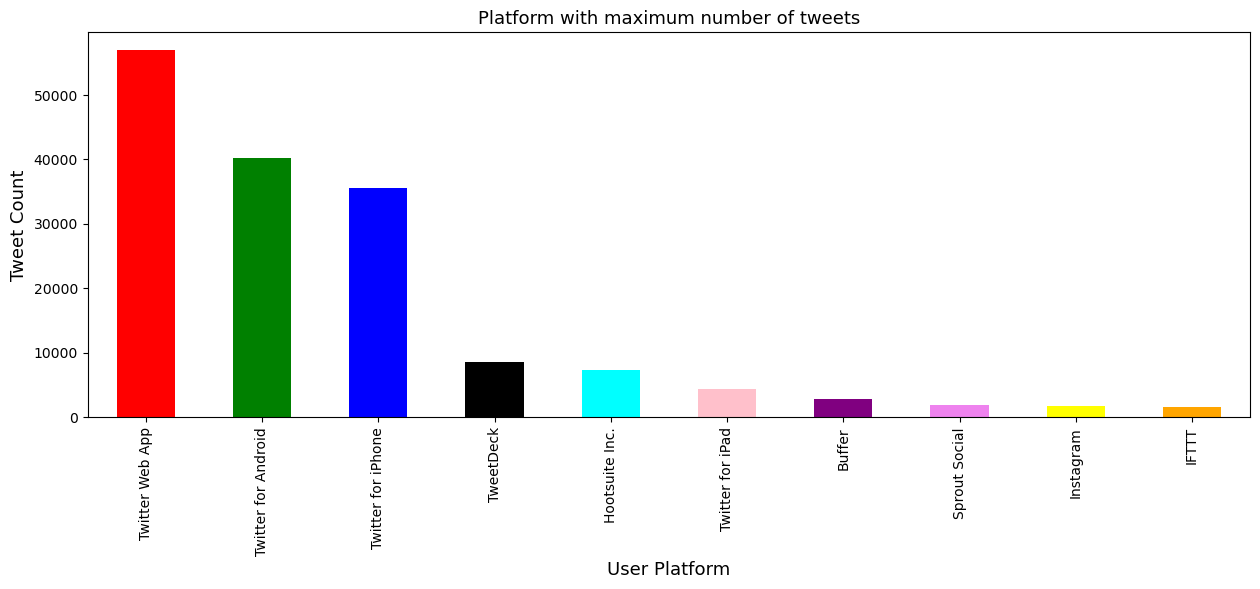

In [44]:
plt.figure(figsize=(15,5))
src = data['source'].value_counts().sort_values(ascending=False)
source = src.head(10)
source.plot.bar(color=['red', 'green', 'blue', 'black','cyan','pink','purple','violet','yellow','orange'])
plt.title('Platform with maximum number of tweets',size=13)
plt.xlabel('User Platform',size=13)
plt.ylabel('Tweet Count',size=13)
plt.show()

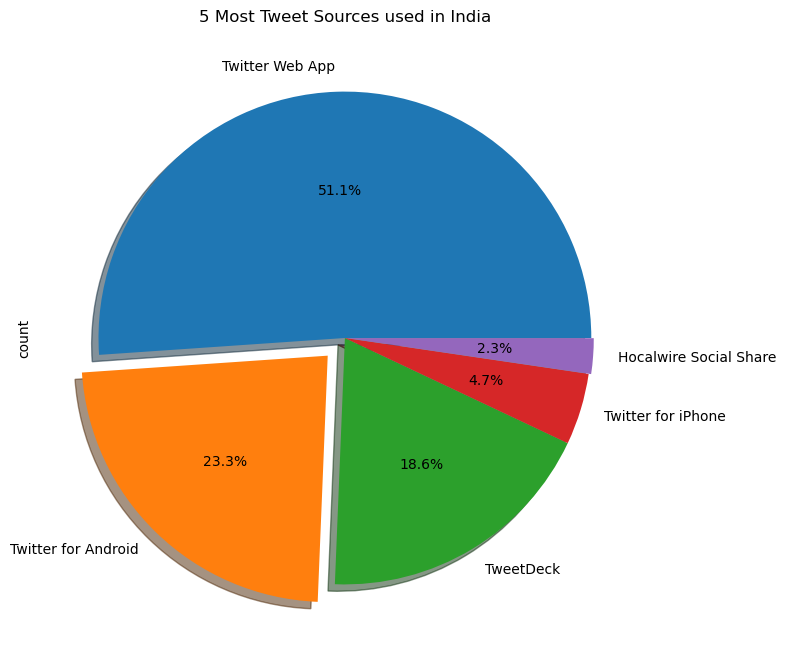

In [45]:
pla = data['source'][data['user_location'] == 'India'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = '5 Most Tweet Sources used in India', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

<Axes: title={'center': 'Top 5 hashtags'}, ylabel='count'>

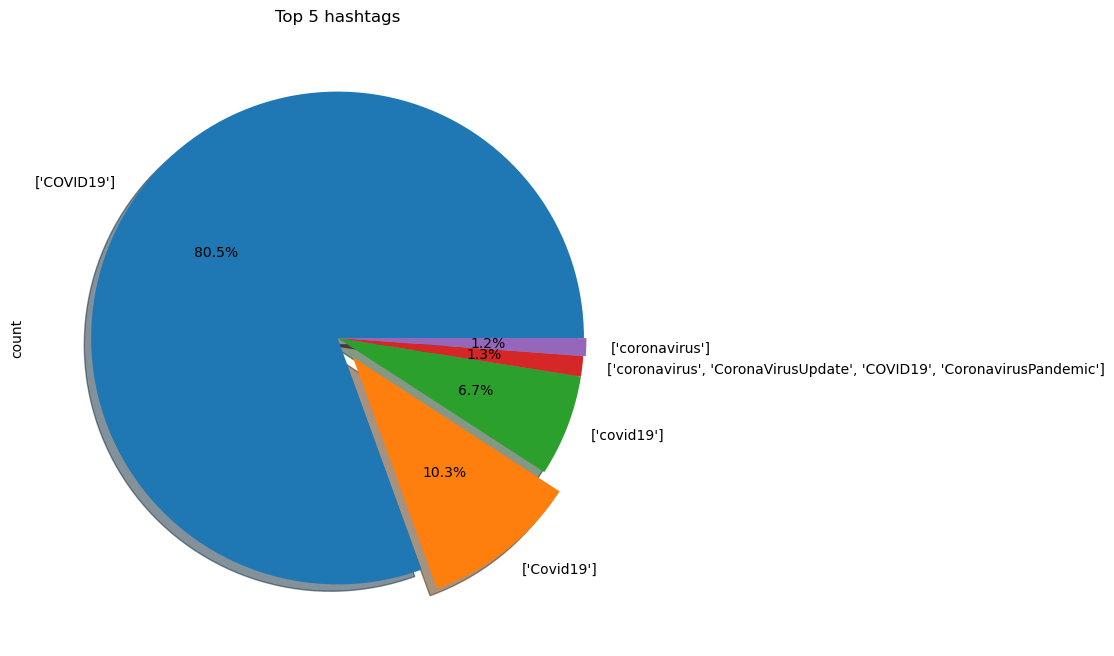

In [46]:
top_tags=data['hashtags'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,8))
explode = (0, 0.1, 0, 0,0.01) 

top_tags[0:5].plot(kind = 'pie',title = 'Top 5 hashtags',autopct='%1.1f%%',shadow=True,explode = explode)

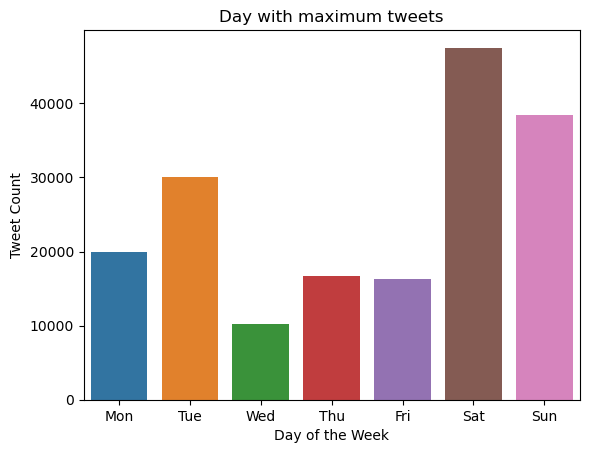

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'day' column contains weekdays as strings
data["date"] = pd.to_datetime(data["date"])
data["Month"] = data["date"].dt.month
data["day"] = data["date"].dt.dayofweek

# Convert the 'day' column to categorical with day names
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data["day"] = data["day"].map(dmap).astype("category")

# Specify the order of weekdays
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.title("Day with maximum tweets")
sns.countplot(x=data["day"], order=weekday_order)
plt.xlabel("Day of the Week")
plt.ylabel("Tweet Count")
plt.show()


# sentiment analysis


In [11]:
import pandas as pd
senti_df = pd.read_csv('./finalSentimentdata2.csv')
senti_df

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [23]:
senti_df['sentiment'].nunique

<bound method IndexOpsMixin.nunique of 0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object>

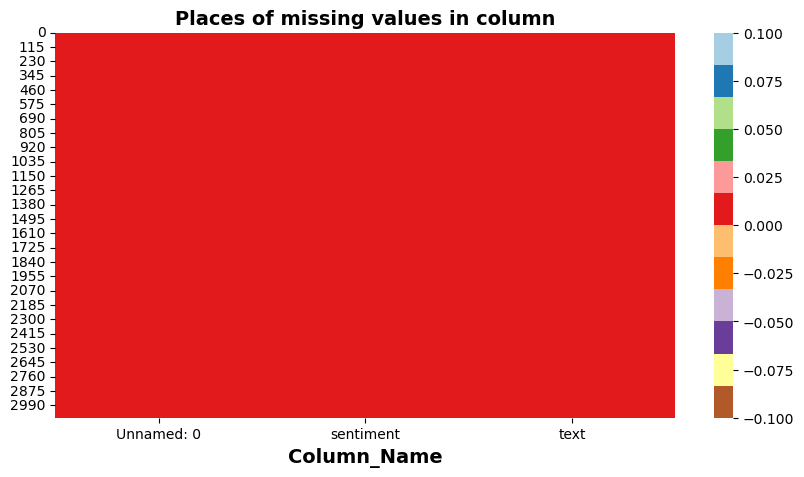

In [26]:
plt.figure(figsize=(10, 5))
sns.heatmap(senti_df.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

# Now let us preprocess text using some NLP tchniques like:

converting to lowercase
remove text in square brackets,
remove links,
remove punctuation
remove words containing numbers
Removing Punctuation
Removing stopwords
Stemming
Lemmatization

In [9]:
pip install stopwords

Note: you may need to restart the kernel to use updated packages.


In [7]:
import re
import string

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    #Removing stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])
    
    #Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])
    
    #Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'C:\\Users\\User\\anaconda3\\nltk_data'
    - 'C:\\Users\\User\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\User\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [3]:
pip install spacy 

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f5

In [2]:
print(df.columns)


Index(['Unnamed: 0', 'sentiment', 'text'], dtype='object')


In [17]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [20]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 65.2 kB/s eta 0:03:16
     ---------------------------------------- 0.0/12.8 MB 65.2 kB/s eta 0:03:16
     ---------------------------------------- 0.0/12.8 MB 87.1 kB/s eta 0:02:27
     --------------------------------------- 0.0/12.8 MB 103.4 kB/s eta 0:02:04
     --------------------------------------- 0.1/12.8 MB 113.8 kB/s eta 0:01:53
     --------------------------------------- 0.1/12.8 MB 125.8 kB/s eta 0:01:42
     --------------------------------------- 0.1/12.8 MB 125.8 kB/s eta 0:01:42
     --------------------------------------- 0.1/12.8 MB 131.0 kB/s eta 0:01:38


In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy

# Load the CSV file into a pandas DataFrame
input_csv_path = 'finalSentimentdata2.csv'
output_csv_path = 'output_file.csv'

df = pd.read_csv(input_csv_path)

# Define functions for text preprocessing
def preprocess_text(text):
    # 1. Converting to lowercase
    text_lower = text.lower()

    # 2. Remove text in square brackets
    text_no_brackets = re.sub(r'\[.*?\]', '', text_lower)

    # 3. Remove links
    text_no_links = re.sub(r'http\S+', '', text_no_brackets)

    # 4. Remove punctuation
    text_no_punctuations = re.sub(r'[^\w\s]', '', text_no_links)

    # 5. Remove words containing numbers
    text_no_numbers = ' '.join(word for word in text_no_punctuations.split() if not any(c.isdigit() for c in word))

    # 6. Removing Punctuation (again, just to be thorough)
    text_no_punctuations_again = re.sub(r'[^\w\s]', '', text_no_numbers)

    # 7. Removing stopwords
    stop_words = set(stopwords.words('english'))
    text_no_stopwords = ' '.join(word for word in text_no_punctuations_again.split() if word.lower() not in stop_words)

    # 8. Stemming (using Porter Stemmer)
    porter_stemmer = PorterStemmer()
    text_stemmed = ' '.join(porter_stemmer.stem(word) for word in text_no_stopwords.split())

    # 9. Lemmatization (using spaCy)
    nlp = spacy.load('en_core_web_sm')
    text_lemmatized = ' '.join(token.lemma_ for token in nlp(text_no_stopwords))

    return text_lemmatized

# Apply text preprocessing to each row in the DataFrame
df['preprocessed_text'] = df['sentiment'].apply(preprocess_text)

# Save the modified DataFrame to a new CSV file
df.to_csv(output_csv_path, index=False)


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

senti_df['text']=senti_df['text'].apply(lambda x: remove_emoji(x))

In [2]:
senti_df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [4]:
import pandas as pd
senti_df = pd.read_csv('./finalSentimentdata2.csv')
senti_df

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [5]:
from textblob import TextBlob

def correct_bytextblob(sent):
    return str(TextBlob(sent).correct())

senti_df['sentiment'] = senti_df['sentiment'].apply(lambda x: correct_bytextblob(x))

senti_df.to_csv('clean_tweets.csv',index=False)


In [6]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(senti_df,test_size = 0.2,random_state=0,stratify = senti_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (2472, 3)
valid shape :  (618, 3)


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


In [8]:
import pandas as pd
senti_df = pd.read_csv('./finalSentimentdata2.csv')
senti_df

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import pandas as pd

# Assuming you have a DataFrame called senti_df
# Split the data into training and validation sets
train, valid = train_test_split(
    senti_df, 
    test_size=0.2, 
    random_state=0, 
    stratify=senti_df['sentiment']
)

stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error='replace', stop_words=stop)

X_train = vectorizer.fit_transform(train['text'].values)
X_valid = vectorizer.transform(valid['text'].values)

y_train = train['sentiment'].values
y_valid = valid['sentiment'].values

print("X_train.shape:", X_train.shape)
print("X_valid.shape:", X_valid.shape)
print("y_train.shape:", y_train.shape)
print("y_valid.shape:", y_valid.shape)


X_train.shape: (2472, 9125)
X_valid.shape: (618, 9125)
y_train.shape: (2472,)
y_valid.shape: (618,)


# ml model building 


In [24]:
#Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have X_train, X_valid, y_train, y_valid defined and preprocessed

# Create a Multinomial Naive Bayes classifier
naiveBayes_clf = MultinomialNB()

# Fit the classifier on the training data
naiveBayes_clf.fit(X_train, y_train)

# Make predictions on the validation set
NB_predictions = naiveBayes_clf.predict(X_valid)

# Calculate accuracy
NB_accuracy = accuracy_score(y_valid, NB_predictions)

# Print results
print("Training Accuracy Score: ", naiveBayes_clf.score(X_train, y_train))
print("Validation Accuracy Score: ", NB_accuracy)
print("Classification Report:")
print(classification_report(NB_predictions, y_valid))


Training Accuracy Score:  0.9555016181229773
Validation Accuracy Score:  0.6812297734627831
Classification Report:
              precision    recall  f1-score   support

       anger       0.55      0.67      0.60       125
        fear       0.65      0.58      0.61       179
         joy       0.71      0.80      0.75       129
         sad       0.82      0.70      0.76       185

    accuracy                           0.68       618
   macro avg       0.68      0.69      0.68       618
weighted avg       0.69      0.68      0.68       618



In [28]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9995954692556634
Validation accuracy Score :  0.6909385113268608
              precision    recall  f1-score   support

       anger       0.64      0.59      0.61       166
        fear       0.57      0.68      0.62       134
         joy       0.79      0.71      0.75       162
         sad       0.77      0.79      0.78       156

    accuracy                           0.69       618
   macro avg       0.69      0.69      0.69       618
weighted avg       0.70      0.69      0.69       618



In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.6440129449838188
              precision    recall  f1-score   support

       anger       0.61      0.58      0.60       161
        fear       0.44      0.70      0.54       101
         joy       0.86      0.55      0.67       226
         sad       0.68      0.83      0.75       130

    accuracy                           0.64       618
   macro avg       0.65      0.67      0.64       618
weighted avg       0.69      0.64      0.65       618



In [1]:
#Extreme Gradient Boosting
!pip install xgboost


In [6]:
print(df.columns)


Index(['Unnamed: 0', 'sentiment', 'text'], dtype='object')


In [7]:
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv('finalSentimentdata2.csv')

# Assuming df is your DataFrame with a 'text' column for features and a 'label' column for labels
X = df['sentiment']
y = df['text']

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Count Vectorization (you might have a different feature extraction method)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid, xgb_prediction)
print("Training accuracy Score    : ", xgboost_clf.score(X_train, y_train))
print("Validation accuracy Score : ", xgb_accuracy)
print(classification_report(xgb_prediction, y_valid))

X_valid = vectorizer.transform(X_valid)

# Now you can use X_train, X_valid, y_train, y_valid in your XGBoost code


In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming you have 'anger', 'fear', 'joy', 'sad' as classes in your 'sentiment' column
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

xgboost_clf = xgb.XGBClassifier()
xgboost_clf.fit(X_train, y_train_encoded)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid_encoded, xgb_prediction)
print("Training accuracy Score    : ", xgboost_clf.score(X_train, y_train_encoded))
print("Validation accuracy Score : ", xgb_accuracy)
print(classification_report(xgb_prediction, y_valid_encoded))



Training accuracy Score    :  0.9045307443365695
Validation accuracy Score :  0.6634304207119741
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       154
           1       0.53      0.67      0.59       127
           2       0.77      0.63      0.69       176
           3       0.75      0.75      0.75       161

    accuracy                           0.66       618
   macro avg       0.67      0.66      0.66       618
weighted avg       0.68      0.66      0.67       618



In [19]:
#support vector machine
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9441747572815534
Validation accuracy Score :  0.6132686084142395
              precision    recall  f1-score   support

       anger       0.56      0.61      0.58       142
        fear       0.47      0.62      0.54       123
         joy       0.76      0.54      0.63       204
         sad       0.67      0.72      0.69       149

    accuracy                           0.61       618
   macro avg       0.62      0.62      0.61       618
weighted avg       0.64      0.61      0.62       618



In [15]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.997168284789644
Validation accuracy Score :  0.6925566343042071
              precision    recall  f1-score   support

       anger       0.62      0.63      0.62       151
        fear       0.57      0.64      0.61       143
         joy       0.81      0.70      0.75       168
         sad       0.77      0.79      0.78       156

    accuracy                           0.69       618
   macro avg       0.69      0.69      0.69       618
weighted avg       0.70      0.69      0.69       618



In [29]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.692557
4,Stochastic Gradient Decent,0.690939
3,Naive Bayes,0.681230
5,XGBoost,0.663430
2,Random Forest,0.644013
0,Support Vector Machines,0.613269
